<a href="https://colab.research.google.com/github/kquigg/Capstone557/blob/Random-Forest/Capstone_CityTestSetGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [315]:
data = pd.DataFrame(pd.read_csv ('/content/drive/My Drive/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv'))
data.describe()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CBSA,CBSA_POP,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
count,220740.000000,2.207390e+05,2.207400e+05,220740.000000,220740.000000,220740.000000,220740.000000,167709.000000,203645.000000,2.207400e+05,...,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,220740.000000,2.207400e+05,2.207400e+05
mean,110370.500000,2.870894e+11,2.870915e+11,28.623190,85.697449,262342.382110,2.221392,341.742661,30514.836210,3.607329e+06,...,-57326.486630,-57326.597590,-57326.483325,10.500000,10.500000,10.500000,7.624884,9.541628,1.655970e+04,4.466074e+07
std,63722.293548,1.640746e+11,1.640774e+11,16.386075,98.818946,351403.837442,1.195155,125.700068,10979.471375,5.219925e+06,...,49459.959391,49459.830782,49459.963223,5.766294,5.766294,5.766294,7.812853,4.373952,3.830373e+04,6.430513e+08
min,1.000000,1.001020e+10,1.001020e+10,1.000000,1.000000,100.000000,0.000000,104.000000,10100.000000,0.000000e+00,...,-99999.000000,-99999.000000,-99999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.685713e+02,4.435890e+03
25%,55185.750000,1.312100e+11,1.312100e+11,13.000000,29.000000,10303.000000,1.000000,218.000000,19740.000000,2.053030e+05,...,-99999.000000,-99999.000000,-99999.000000,5.750000,5.750000,5.750000,1.000000,5.833333,3.271213e+03,4.985104e+05
50%,110370.500000,2.901900e+11,2.901900e+11,29.000000,61.000000,46298.000000,2.000000,361.000000,32820.000000,1.252890e+06,...,-99999.000000,-99999.000000,-99999.000000,10.500000,10.500000,10.500000,1.000000,9.166667,5.877323e+03,1.373918e+06
75%,165555.250000,4.200350e+11,4.200350e+11,42.000000,109.000000,482503.000000,3.000000,429.000000,39300.000000,4.673634e+06,...,0.142514,0.000354,0.161708,15.250000,15.250000,15.250000,16.000000,13.166667,1.596391e+04,9.413158e+06
max,220740.000000,7.803100e+11,7.803100e+11,78.000000,840.000000,993000.000000,9.000000,566.000000,49820.000000,1.931847e+07,...,1.000000,1.000000,1.000000,20.000000,20.000000,20.000000,20.000000,20.000000,3.925989e+06,1.641290e+11


In [316]:
# find the originial shape of the dataframe
data.shape

(220740, 117)

In [317]:
data.tail(40)

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
220700,220701,7.801100e+11,7.801100e+11,78,10,971300,1,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,8,1,3.333333,18323.397510,8.029712e+06
220701,220702,7.801100e+11,7.801100e+11,78,10,970200,2,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,14,1,5.333333,15224.574500,4.972788e+06
220702,220703,7.801100e+11,7.801100e+11,78,10,970500,3,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,10,1,4.000000,9483.012429,3.650763e+06
220703,220704,7.801100e+11,7.801100e+11,78,10,970200,1,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,17,1,6.333333,3291.041240,5.489574e+05
220704,220705,7.801100e+11,7.801100e+11,78,10,971000,1,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,4,1,2.000000,27816.747680,3.102336e+07
220705,220706,NaN,7.801100e+11,78,10,990000,0,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,1,1,1.000000,226686.162300,6.279305e+08
220706,220707,7.801100e+11,7.801100e+11,78,10,970100,2,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,7,1,3.000000,32061.928900,2.387047e+07
220707,220708,7.801100e+11,7.801100e+11,78,10,971200,4,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,13,1,5.000000,4896.555929,1.034835e+06
220708,220709,7.801100e+11,7.801100e+11,78,10,970300,3,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,13,1,5.000000,7671.409913,1.965577e+06
220709,220710,7.801100e+11,7.801100e+11,78,10,970600,3,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,17,1,6.333333,2610.739898,3.603123e+05


In [318]:
# bottom of the table has errors when mixing with GIS, so remove bottom 40 rows
data = data.iloc[:-40]
data.shape

(220700, 117)

In [319]:
data.tail()

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area
220695,220696,7.801100e+11,7.801100e+11,78,10,970500,2,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,15,1,5.666667,5032.206718,1.222670e+06
220696,220697,7.801100e+11,7.801100e+11,78,10,971300,2,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,15,1,5.666667,3168.900538,6.076288e+05
220697,220698,7.801100e+11,7.801100e+11,78,10,970100,1,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,10,1,4.000000,19237.623100,7.614912e+06
220698,220699,7.801100e+11,7.801100e+11,78,10,970400,2,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,10,1,4.000000,9628.634418,3.818509e+06
220699,220700,7.801100e+11,7.801100e+11,78,10,971100,3,NaN,NaN,NaN,...,-99999.0,-99999.0,-99999.0,1,1,20,1,7.333333,5556.629977,1.457669e+06


# Column Names

In [251]:
ColumnNames = pd.DataFrame(pd.read_csv('/content/drive/My Drive/CapstoneColumnNames.csv', header = None))

In [252]:
ColumnNames = ColumnNames[0].str.split(r',', expand=True)
ColumnNames_First = ColumnNames[0].str.split(r'\(', expand=True)
ColumnNames_Second = ColumnNames[1].str.split(r':', expand=True)
ColumnNames = pd.concat([ColumnNames_First[0], ColumnNames_Second[1]], axis=1)
ColumnNames = ColumnNames.map(lambda x: x.strip() if isinstance(x, str) else x)

In [253]:
print(ColumnNames.to_string())

                         0                                                                                                                                 1
0                  GEOID10                                                                                      Census block group 12-digit FIPS code (2010)
1                  GEOID20                                                                                      Census block group 12-digit FIPS code (2018)
2                  STATEFP                                                                                                                   State FIPS code
3                 COUNTYFP                                                                                                                  County FIPS code
4                  TRACTCE                                                                                       Census tract FIPS code in which CBG resides
5                 BLKGRPCE                                

# Cleaning

In [254]:
#find the number of nulls
print(data.isnull().sum().sum())
print(data.shape)

141517
(220700, 117)


In [255]:
# remove all rows that contain null values
data = data.dropna()
print(data.isnull().sum().sum())
print(data.shape)

0
(167265, 117)


In [256]:
# list all of the field names
column_list = data.columns.tolist()
print(column_list)

['OBJECTID', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA', 'CBSA_Name', 'CBSA_POP', 'CBSA_EMP', 'CBSA_WRK', 'Ac_Total', 'Ac_Water', 'Ac_Land', 'Ac_Unpr', 'TotPop', 'CountHU', 'HH', 'P_WrkAge', 'AutoOwn0', 'Pct_AO0', 'AutoOwn1', 'Pct_AO1', 'AutoOwn2p', 'Pct_AO2p', 'Workers', 'R_LowWageWk', 'R_MedWageWk', 'R_HiWageWk', 'R_PCTLOWWAGE', 'TotEmp', 'E5_Ret', 'E5_Off', 'E5_Ind', 'E5_Svc', 'E5_Ent', 'E8_Ret', 'E8_off', 'E8_Ind', 'E8_Svc', 'E8_Ent', 'E8_Ed', 'E8_Hlth', 'E8_Pub', 'E_LowWageWk', 'E_MedWageWk', 'E_HiWageWk', 'E_PctLowWage', 'D1A', 'D1B', 'D1C', 'D1C5_RET', 'D1C5_OFF', 'D1C5_IND', 'D1C5_SVC', 'D1C5_ENT', 'D1C8_RET', 'D1C8_OFF', 'D1C8_IND', 'D1C8_SVC', 'D1C8_ENT', 'D1C8_ED', 'D1C8_HLTH', 'D1C8_PUB', 'D1D', 'D1_FLAG', 'D2A_JPHH', 'D2B_E5MIX', 'D2B_E5MIXA', 'D2B_E8MIX', 'D2B_E8MIXA', 'D2A_EPHHM', 'D2C_TRPMX1', 'D2C_TRPMX2', 'D2C_TRIPEQ', 'D2R_JOBPOP', 'D2R_WRKEMP', 'D2A_WRKEMP', 'D2C_WREMLX', 'D3A', 'D3AAO', 'D3AMM', 'D3APO', 'D3B', 'D3

In [257]:
data = data.drop(columns=['GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA', 'CBSA_Name', 'Shape_Length', 'Shape_Area'])
data = data.set_index('OBJECTID')

In [258]:
print(data.head())

          CBSA_POP  CBSA_EMP  CBSA_WRK    Ac_Total  Ac_Water     Ac_Land  \
OBJECTID                                                                   
1          7189384   3545715   3364458   73.595028       0.0   73.595028   
2          7189384   3545715   3364458  119.829909       0.0  119.829909   
3          7189384   3545715   3364458   26.367053       0.0   26.367053   
4          7189384   3545715   3364458  119.060687       0.0  119.060687   
5          7189384   3545715   3364458  169.927211       0.0  169.927211   

             Ac_Unpr  TotPop  CountHU     HH  ...     D5CEI      D5DR  \
OBJECTID                                      ...                       
1          73.595028    1202    460.0  423.0  ...  0.841299  0.000525   
2         119.214200     710    409.0  409.0  ...  0.753958  0.000919   
3          26.367050     737    365.0  329.0  ...  0.800475  0.000894   
4         119.060687     904    384.0  384.0  ...  0.825778  0.000653   
5         148.742920     948 

In [259]:
# make the walkability score its own dependent variable
walkability_given = data['NatWalkInd']
print(walkability_given.describe())
data = data.drop('NatWalkInd', axis = 1)

count    167265.000000
mean         10.247944
std           4.287695
min           1.000000
25%           6.500000
50%          10.333333
75%          13.833333
max          20.000000
Name: NatWalkInd, dtype: float64


In [260]:
data.shape # should be (167265, 111)

(167265, 103)

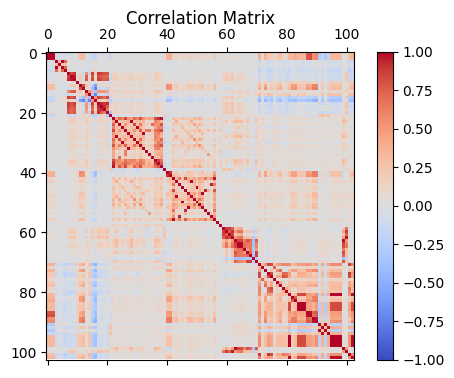

In [261]:
# make correlation and covariance matrix
corr_matrix = data.corr()
cov_matrix = data.cov()

fig, ax = plt.subplots(figsize=(6, 4))

# Display the correlation matrix as an image
corr_matrix_image = ax.matshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)

# Add color bar
fig.colorbar(corr_matrix_image)

# Show the plot
plt.title("Correlation Matrix", pad=20)
plt.show()

Everything really red or really blue is highly correlated and should be reviewed to be removed after PCA, if PCA doesn't cover it. It is really cool how the highly correlated fields seem to form squares. This shows that the correlated columns are next to each other, which makes sense when looking at the column names.

# City Test Indexes

In [262]:
Boston_RawData = pd.DataFrame(pd.read_excel('/content/drive/My Drive/BostonTable.xls'))
Raleigh_RawData = pd.DataFrame(pd.read_excel('/content/drive/My Drive/RaleighTable.xls'))
Chicago_RawData = pd.DataFrame(pd.read_excel('/content/drive/My Drive/ChicagoTable.xls'))
BostonIndex = Boston_RawData['ID_Value']
RaleighIndex = Raleigh_RawData['ID_Value']
ChicagoIndex = Chicago_RawData['ID_Value']
total_rows_to_delete = (len(BostonIndex)+len(RaleighIndex)+len(ChicagoIndex))
print("Number of rows in Boston: ", len(BostonIndex))
print("Number of rows in Raleigh: ", len(RaleighIndex))
print("Number of rows in Chicago: ", len(ChicagoIndex))
print("Total number of rows: ", total_rows_to_delete)

#verify that the raw test sets have no null values
print("Number of null values in Boston dataset: ", Boston_RawData.isna().sum().sum())
print("Number of null values in Raleigh dataset: ", Raleigh_RawData.isna().sum().sum())
print("Number of null values in Chicago dataset: ", Chicago_RawData.isna().sum().sum())

Number of rows in Boston:  2628
Number of rows in Raleigh:  646
Number of rows in Chicago:  4758
Total number of rows:  8032
Number of null values in Boston dataset:  0
Number of null values in Raleigh dataset:  0
Number of null values in Chicago dataset:  0


# Build City Test Sets

In [263]:
data['NatWalkInd'] = walkability_given

In [264]:
data.head()

,CBSA_POP,CBSA_EMP,CBSA_WRK,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,...,D5CEI,D5DR,D5DRI,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd
OBJECTID,,,,,,,,,,,,,,,,,,,,,
1,7189384,3545715,3364458,73.595028,0.0,73.595028,73.595028,1202,460.0,423.0,...,0.841299,0.000525,0.184697,0.000476,0.137707,6,14,15,17,14.000000
2,7189384,3545715,3364458,119.829909,0.0,119.829909,119.214200,710,409.0,409.0,...,0.753958,0.000919,0.323221,0.000801,0.231868,3,10,12,14,10.833333
3,7189384,3545715,3364458,26.367053,0.0,26.367053,26.367050,737,365.0,329.0,...,0.800475,0.000894,0.314628,0.000736,0.213146,1,1,7,17,8.333333
4,7189384,3545715,3364458,119.060687,0.0,119.060687,119.060687,904,384.0,384.0,...,0.825778,0.000653,0.229821,0.000708,0.205018,16,10,17,17,15.666667
5,7189384,3545715,3364458,169.927211,0.0,169.927211,148.742920,948,343.0,343.0,...,0.659846,0.000469,0.164863,0.000433,0.125296,4,7,11,14,10.166667


In [265]:
Boston_Test = data.loc[BostonIndex]
Raleigh_Test = data.loc[RaleighIndex]
Chicago_Test = data.loc[ChicagoIndex]
print("Boston Test Set Shape: ", Boston_Test.shape)
print("Raleigh Test Set Shape: ", Raleigh_Test.shape)
print("Chicago Test Set Shape: ", Chicago_Test.shape)

Boston Test Set Shape:  (2628, 104)
Raleigh Test Set Shape:  (646, 104)
Chicago Test Set Shape:  (4758, 104)


In [266]:
print("Data Set Shape Before Dropping City Test Sets: ", data.shape)
data = data.drop(BostonIndex)
data = data.drop(RaleighIndex)
data = data.drop(ChicagoIndex)
print("Data Set Shape After Dropping City Test Sets: ", data.shape)

Data Set Shape Before Dropping City Test Sets:  (167265, 104)
Data Set Shape After Dropping City Test Sets:  (159233, 104)


In [267]:
walkability_given = data['NatWalkInd']
data = data.drop('NatWalkInd', axis = 1)
print("X Data Shape: ", data.shape)
print("Y Data Shape: ", walkability_given.shape)
print("Y Data Description: \n", walkability_given.describe())

X Data Shape:  (159233, 103)
Y Data Shape:  (159233,)
Y Data Description: 
 count    159233.000000
mean         10.119862
std           4.279203
min           1.000000
25%           6.500000
50%          10.166667
75%          13.666667
max          20.000000
Name: NatWalkInd, dtype: float64


# Preprocessing


In [268]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [269]:
# Splitting df before any transformations to avoid leakage

X = data
y = walkability_given

np.random.seed(1)
X = X.sample(n=1000, axis=0, random_state=1)
y = y.loc[X.index]
print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

(1000, 103)
(1000,)


In [270]:
# Scaling data using standard scaler to 1. maintain shape of original distributions and 2. ensure all features contribute equally to PCA

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)


In [271]:
# Observe scaling effects
print("Original first 2 rows:")
print(X_train.iloc[:2])
print("Scaled first 2 rows:")
print(X_train_scaled_df.iloc[:2])

Original first 2 rows:
          CBSA_POP  CBSA_EMP  CBSA_WRK    Ac_Total   Ac_Water     Ac_Land  \
OBJECTID                                                                    
173800      645329    302655    289867  204.430031   0.000000  204.430031   
155825    19318471   9159786   8946175  177.559635  76.804857  100.754778   

            Ac_Unpr  TotPop  CountHU     HH  ...      D5CE     D5CEI  \
OBJECTID                                     ...                       
173800    204.43003     529    371.0  242.0  ...  0.002668  0.924031   
155825     82.63146    2118    812.0  712.0  ...  0.000035  0.218241   

              D5DR     D5DRI      D5DE     D5DEI  D2A_Ranked  D2B_Ranked  \
OBJECTID                                                                   
173800    0.005673  0.544474  0.003721  0.283748          10           1   
155825    0.000003  0.006192  0.000008  0.020042          11          12   

          D3B_Ranked  D4A_Ranked  
OBJECTID                          
1738

In [272]:
# Verify mean ≈ 0 and std ≈ 1
print("Means:", X_train_scaled_df.mean())
print("Standard deviations:", X_train_scaled_df.std())

Means: CBSA_POP      0.000000e+00
CBSA_EMP     -5.773160e-17
CBSA_WRK      5.773160e-17
Ac_Total     -1.776357e-17
Ac_Water      1.665335e-18
                  ...     
D5DEI        -1.221245e-16
D2A_Ranked    1.298961e-16
D2B_Ranked    1.154632e-16
D3B_Ranked    9.658940e-17
D4A_Ranked    4.218847e-17
Length: 103, dtype: float64
Standard deviations: CBSA_POP      1.000626
CBSA_EMP      1.000626
CBSA_WRK      1.000626
Ac_Total      1.000626
Ac_Water      1.000626
                ...   
D5DEI         1.000626
D2A_Ranked    1.000626
D2B_Ranked    1.000626
D3B_Ranked    1.000626
D4A_Ranked    1.000626
Length: 103, dtype: float64


In [273]:
#PCA

pca = PCA(n_components=0.95)  # n = 95% variance

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [274]:
# Check dimensions
print("Training set shape:", X_train_pca.shape)
print("Test set shape:", X_test_pca.shape)

Training set shape: (800, 32)
Test set shape: (200, 32)


In [275]:
# Visualize with screeplot

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

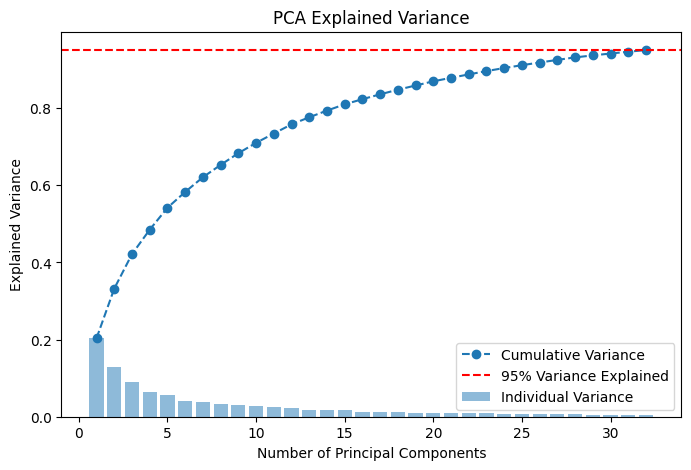

In [276]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--', label="Cumulative Variance")
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, label="Individual Variance")

plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance Explained")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance")
plt.title("PCA Explained Variance")
plt.legend()
plt.show()

Conducting PCA while retaining 95% of variance gives 46 components. There is a significant drop in individual variance after ~20 components, and while the "elbow method" would suggest removing most components after this mark- my priority right now is to retain variance so I will use all 46 for now.

If processing time presents issues later I am comfortable exploring the effects of using 35-40 components.

# Additional Exploration

In [277]:
# Map PCA loadings to original features
pca_loadings = pd.DataFrame(
    pca.components_[:len(explained_variance_ratio)].T,
    index=X_train.columns,
    columns=[f'PC{i+1}' for i in range(len(explained_variance_ratio))]
)

print(pca_loadings.head())

               PC1       PC2       PC3       PC4       PC5       PC6  \
CBSA_POP  0.086408  0.108022  0.039880  0.142451  0.094874  0.170256   
CBSA_EMP  0.086521  0.107275  0.042122  0.141869  0.096089  0.167425   
CBSA_WRK  0.086838  0.107349  0.041850  0.141719  0.097713  0.168377   
Ac_Total -0.017275 -0.047818  0.001534 -0.017834  0.077127  0.051970   
Ac_Water -0.014309 -0.047063  0.015701 -0.011897  0.052304  0.012030   

               PC7       PC8       PC9      PC10  ...      PC23      PC24  \
CBSA_POP  0.130132  0.157920 -0.089451  0.077706  ... -0.034814 -0.089630   
CBSA_EMP  0.130611  0.158876 -0.088348  0.076657  ... -0.036458 -0.085576   
CBSA_WRK  0.130252  0.158047 -0.087706  0.073577  ... -0.037330 -0.083369   
Ac_Total  0.131300 -0.119494  0.432423  0.251628  ... -0.064449  0.003115   
Ac_Water  0.040214 -0.054711  0.195167  0.100252  ...  0.467556  0.027217   

              PC25      PC26      PC27      PC28      PC29      PC30  \
CBSA_POP -0.053349 -0.060364 -0.

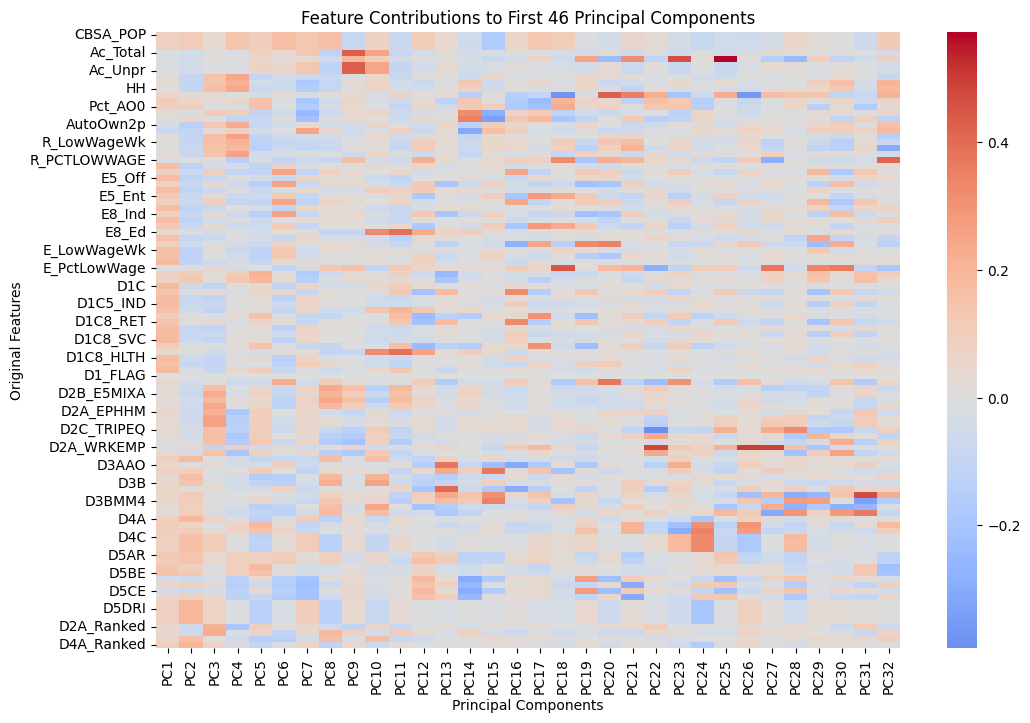

In [278]:
# Visualize loadings

plt.figure(figsize=(12, 8))
sns.heatmap(pca_loadings, cmap="coolwarm", center=0, annot=False)
plt.title("Feature Contributions to First 46 Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.show()

In [279]:
# Create df from scaled pca data and add back target variable. Also, index the dataframe with X_train
X_train_index = X_train.index
X_train_pca_df = pd.DataFrame(X_train_pca, index= X_train_index, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])

X_train_pca_df['NatWalkInd'] = y_train

# Correlation
pca_target_correlation = X_train_pca_df.corr()['NatWalkInd'].drop('NatWalkInd').sort_values(ascending=False)

# Display top 10 PCs most correlated with the target
print("Correlation between PCA components and target variable:")
print(pca_target_correlation.head(10))


Correlation between PCA components and target variable:
PC2     0.604742
PC1     0.486892
PC3     0.439005
PC7     0.096224
PC26    0.068257
PC10    0.051022
PC8     0.046137
PC14    0.032408
PC29    0.028924
PC32    0.028587
Name: NatWalkInd, dtype: float64


In [280]:
X_test_index = X_test.index
X_test_pca_df = pd.DataFrame(X_test_pca, index= X_test_index, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])
print(X_test_pca_df.shape)

(200, 32)


In [281]:
# Find PC most positively correlated with targer
most_correlated_pc = pca_target_correlation.idxmax()

# Contributing features to top PC
top_features = pca_loadings[[most_correlated_pc]].abs().sort_values(by=most_correlated_pc, ascending=False).head(10)

print("Top features contributing to {most_correlated_pc}:")
print(top_features)


Top features contributing to {most_correlated_pc}:
                 PC2
D4A_Ranked  0.199995
D5DEI       0.195763
D5DRI       0.195763
D5DR        0.195763
D5DE        0.195763
D4A         0.195595
D3A         0.179531
D3B_Ranked  0.166073
D4D         0.156906
D3APO       0.156254


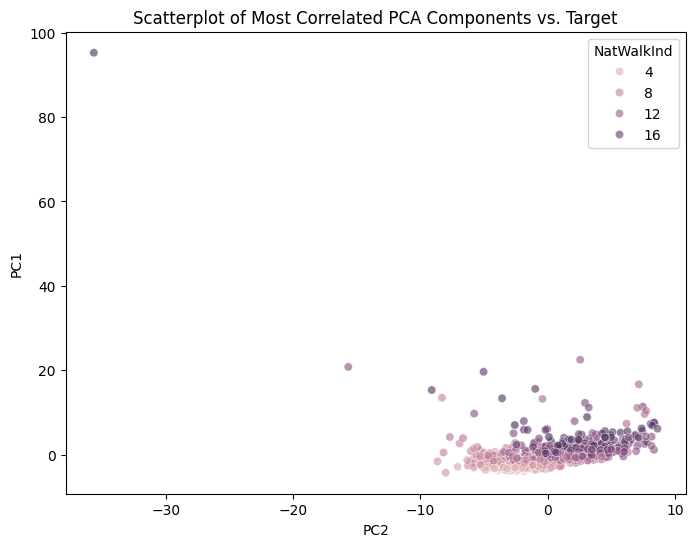

In [282]:
# Find and plot two most correlated PCs against each other, colored by index value
top_2_pcs = pca_target_correlation.index[:2]


plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca_df[top_2_pcs[0]], y=X_train_pca_df[top_2_pcs[1]], hue=y_train, alpha=0.6)
plt.xlabel(top_2_pcs[0])
plt.ylabel(top_2_pcs[1])
plt.title("Scatterplot of Most Correlated PCA Components vs. Target")
plt.legend(title="NatWalkInd")
plt.show()

** *The following explores correlation using original features, not principal commponents* **



In [283]:
# Features most correlated with walkindex
feature_target_correlation = X_train.corrwith(y_train).sort_values(ascending=False)

print("Top 10 original features correlated with the target:")
print(feature_target_correlation.head(10))


Top 10 original features correlated with the target:
D4A_Ranked    0.863578
D5DRI         0.841624
D5DEI         0.841624
D5DE          0.841624
D5DR          0.841624
D4A           0.840855
D3B_Ranked    0.750769
D3A           0.706835
D4C           0.696624
D4E           0.696574
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


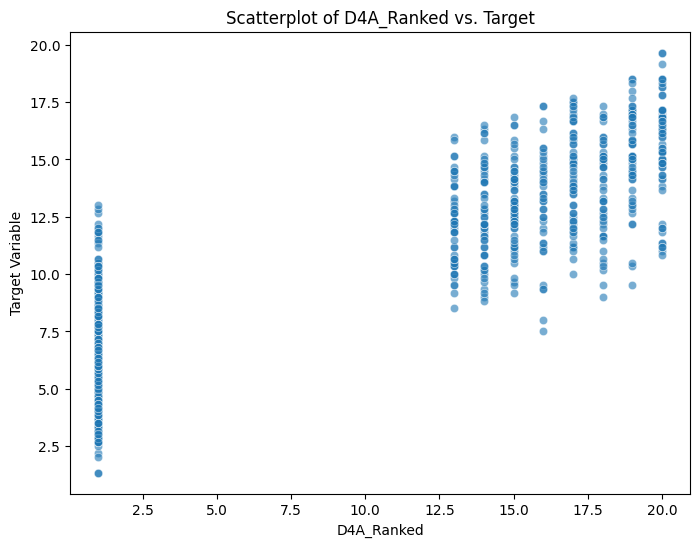

In [284]:
# Plot most positively correlated feature against target
top_feature = feature_target_correlation.idxmax()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[top_feature], y=y_train, alpha=0.6)
plt.xlabel(top_feature)
plt.ylabel("Target Variable")
plt.title(f"Scatterplot of {top_feature} vs. Target")
plt.show()

D4A_Ranked ( type: esriFieldTypeDouble, alias: Quantile ranked order (1,13-20) of [D4a] from lowest to highest )

D4A (Distance from the population-weighted centroid to nearest transit stop (meters) )

KeyError: 'PC2'

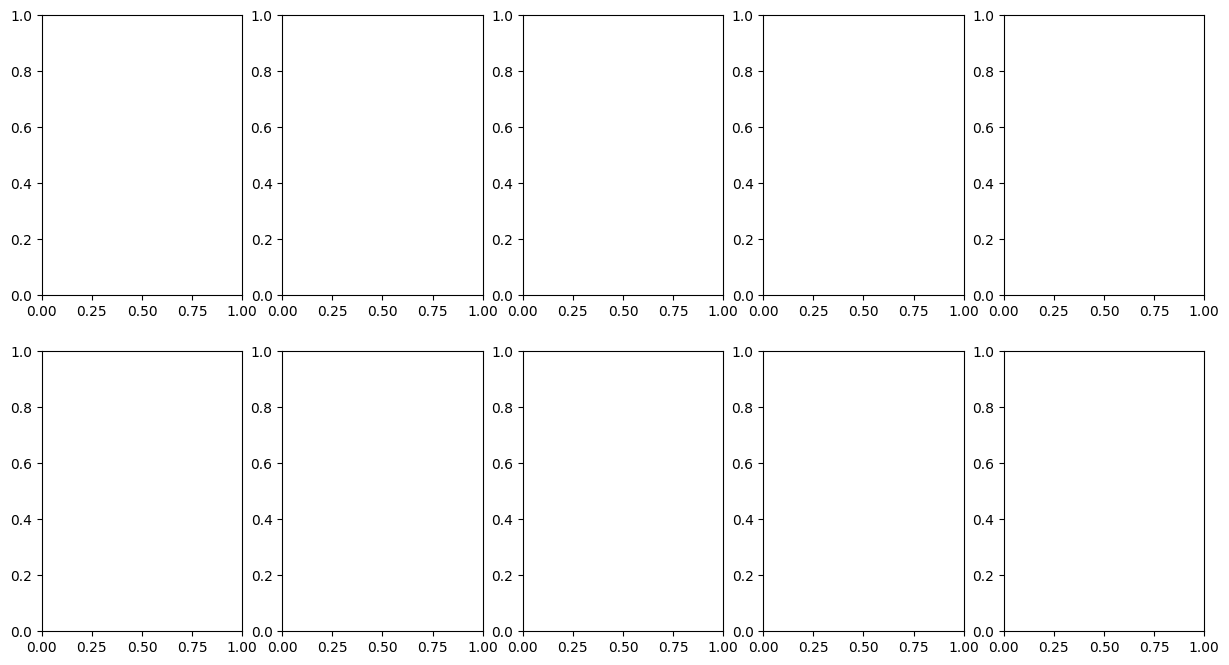

In [285]:
# Scatterplots of target vs. top features (picked based on earlier pc32 results)
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(top_features):
    sns.scatterplot(x=X_train[feature], y=y_train, alpha=0.6, ax=axes[i])
    axes[i].set_title(f"{feature} vs. Target")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Target")

plt.tight_layout()
plt.show()


# Random Forest Model

In [286]:
from sklearn.ensemble import RandomForestRegressor

In [287]:
# find the tuning parameters of the random forest model and the default values.
def find_parameter(model):
  model1= model()
  print("Default Parameters:")
  for param, value in model1.get_params().items():
    print(f"{param}: {value}")
find_parameter(RandomForestRegressor)

Default Parameters:
bootstrap: True
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: 1.0
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 100
n_jobs: None
oob_score: False
random_state: None
verbose: 0
warm_start: False


In [288]:
X_train_preprocessed = X_train_pca_df.drop('NatWalkInd', axis=1)
X_test_preprocessed = X_test_pca_df

In [289]:
# find the default model scores before tuning
def default_scores(model):
  model1 = model()
  model1.fit(X_train_preprocessed, y_train)
  print("Training score:", model1.score(X_train_preprocessed, y_train))
  print("Test score:", model1.score(X_test_preprocessed, y_test))
default_scores(RandomForestRegressor)

Training score: 0.9877243540817331
Test score: 0.9213240664889002


## Max Depth Tuning

In [290]:
import time
fit_time = []
score = []
params = [5, 15, 20, 30]

for p in params:
    model = RandomForestRegressor(max_depth=p)
    start = time.time()
    model.fit(X_train_preprocessed, y_train)
    stop = time.time()
    fit_time.append(stop - start)
    score.append(model.score(X_test_preprocessed, y_test))

print("Max_depth values fit times score \n")
for p, t, s in list(zip(params, fit_time, score)):
    print(f"{p:<5} {t:>10.1f}  {s:>5.4f}")

Max_depth values fit times score 

5            0.7  0.9043
15           1.3  0.9225
20           1.5  0.9249
30           1.1  0.9214


In [291]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_grid = {'max_depth': [5, 15, 20, 30]}
grid_search = GridSearchCV(model, param_grid, cv=3,
                          scoring='r2',
                          return_train_score=True,
                          refit = True)

In [292]:
grid_search.fit(X_train_preprocessed, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test_preprocessed, y_test)))

Test set score: 0.92


In [293]:
best_params = grid_search.best_params_
mean_scores = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
print("Best max_depth:", best_params['max_depth'])
print("Best score: {:.2f}".format(mean_scores.max()))
print("Standard deviation: {:.2f}".format(mean_scores.std()))

Best max_depth: 15
Best score: 0.89
Standard deviation: 0.01


## N Estimators Tuning

In [294]:
import time
fit_time = []
score = []
params = [100, 200, 500, 1000]

for p in params:
    model = RandomForestRegressor(n_estimators=p)
    start = time.time()
    model.fit(X_train_preprocessed, y_train)
    stop = time.time()
    fit_time.append(stop - start)
    score.append(model.score(X_test_preprocessed, y_test))

print("Max_depth values fit times score \n")
for p, t, s in list(zip(params, fit_time, score)):
    print(f"{p:<5} {t:>10.1f}  {s:>5.4f}")

Max_depth values fit times score 

100          1.4  0.9263
200          2.3  0.9257
500          7.3  0.9250
1000        12.7  0.9256


In [295]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_grid = {'n_estimators': [100, 200, 500]}
grid_search = GridSearchCV(model, param_grid, cv=3,
                          scoring='r2',
                          return_train_score=True,
                          refit = True)

In [296]:
grid_search.fit(X_train_preprocessed, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test_preprocessed, y_test)))

Test set score: 0.92


In [297]:
best_params = grid_search.best_params_
mean_scores = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']
print("Best n_estimator:", best_params['n_estimators'])
print("Best score: {:.2f}".format(mean_scores.max()))
print("Standard deviation: {:.2f}".format(mean_scores.std()))

Best n_estimator: 200
Best score: 0.89
Standard deviation: 0.00


## Best Random Forest Model

In [303]:
model = RandomForestRegressor(max_depth=15, n_estimators=200)
model.fit(X_train_preprocessed, y_train)

RandomForestRegressor(max_depth=15, n_estimators=200)

In [304]:
print("Training score:", model.score(X_train_preprocessed, y_train))
print("Test score:", model.score(X_test_preprocessed, y_test))

Training score: 0.9880038362338148
Test score: 0.9228751258833655


In [305]:
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(X_train_preprocessed)
y_test_pred = model.predict(X_test_preprocessed)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.1868052597868946


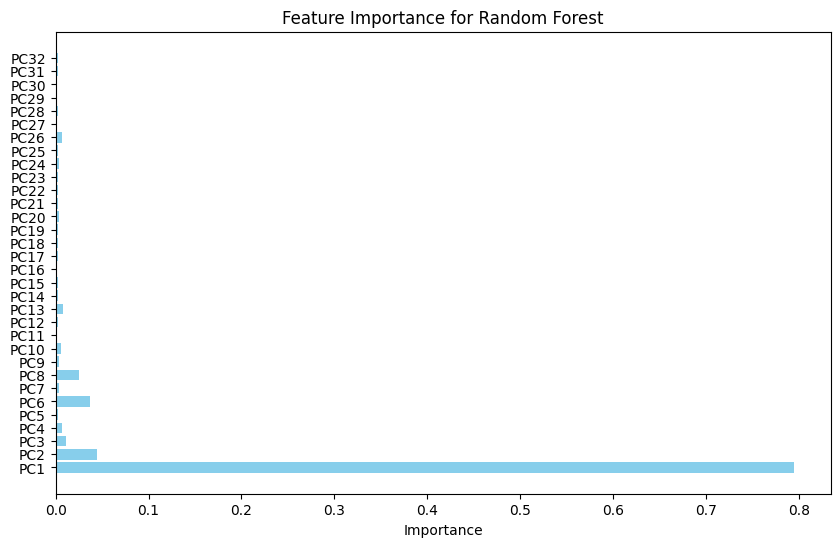

In [306]:
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X_train_preprocessed.columns, feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Random Forest')
plt.show()

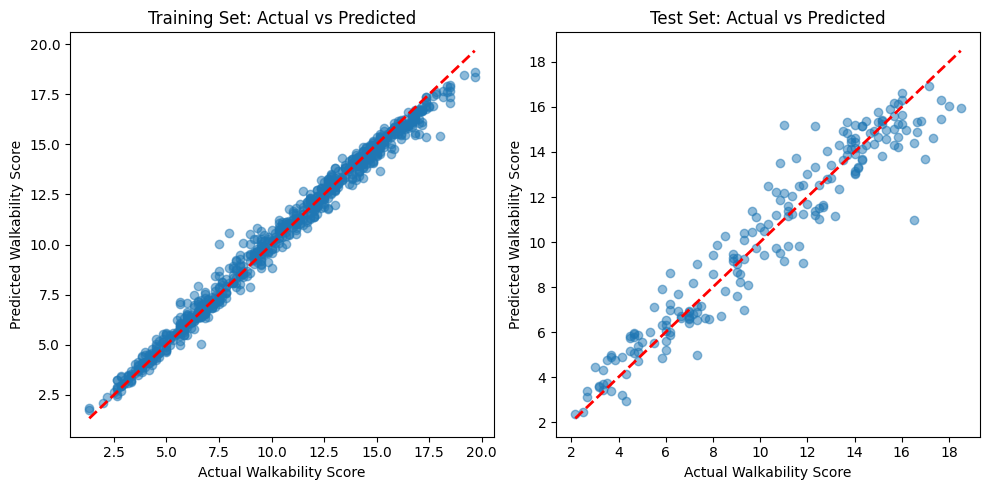

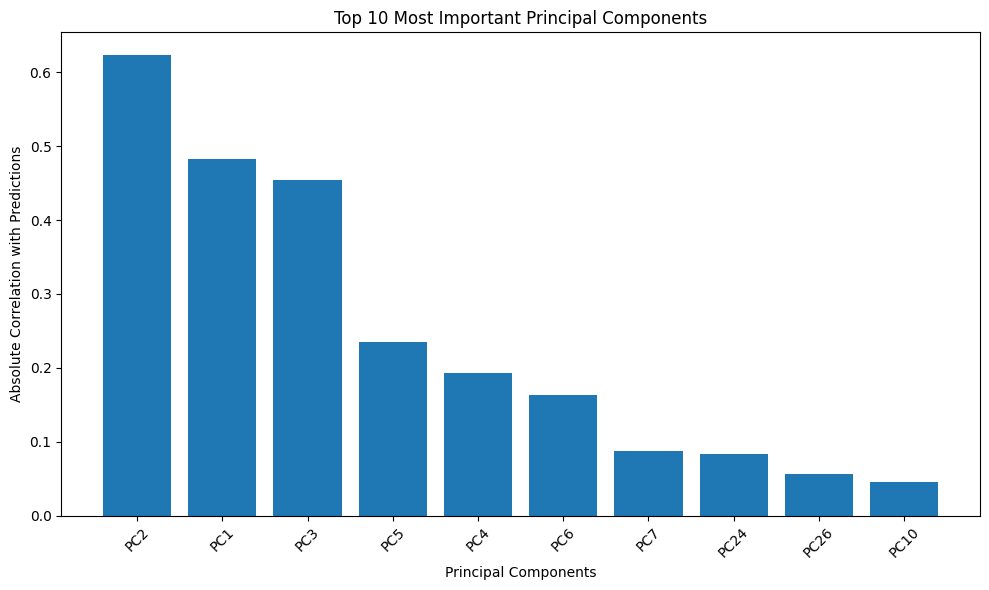

In [307]:
# Visualize actual vs predicted values
plt.figure(figsize=(10, 5))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Walkability Score')
plt.ylabel('Predicted Walkability Score')
plt.title('Training Set: Actual vs Predicted')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Walkability Score')
plt.ylabel('Predicted Walkability Score')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

# Feature importance through correlation with predictions
pred_importance = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(X_train_pca.shape[1])],
    'Correlation': [np.corrcoef(X_train_pca[:, i], y_train_pred)[0, 1] for i in range(X_train_pca.shape[1])]
})
pred_importance = pred_importance.sort_values('Correlation', key=abs, ascending=False)

# visualize top 10 most important features
plt.figure(figsize=(10, 6))
plt.bar(range(10), abs(pred_importance['Correlation'][:10]))
plt.xticks(range(10), pred_importance['PC'][:10], rotation=45)
plt.xlabel('Principal Components')
plt.ylabel('Absolute Correlation with Predictions')
plt.title('Top 10 Most Important Principal Components')
plt.tight_layout()
plt.show()


# Decision Tree

In [308]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [309]:
find_parameter(DecisionTreeRegressor)

Default Parameters:
ccp_alpha: 0.0
criterion: squared_error
max_depth: None
max_features: None
max_leaf_nodes: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
random_state: None
splitter: best


In [310]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train_preprocessed, y_train)

DecisionTreeRegressor(max_depth=3)

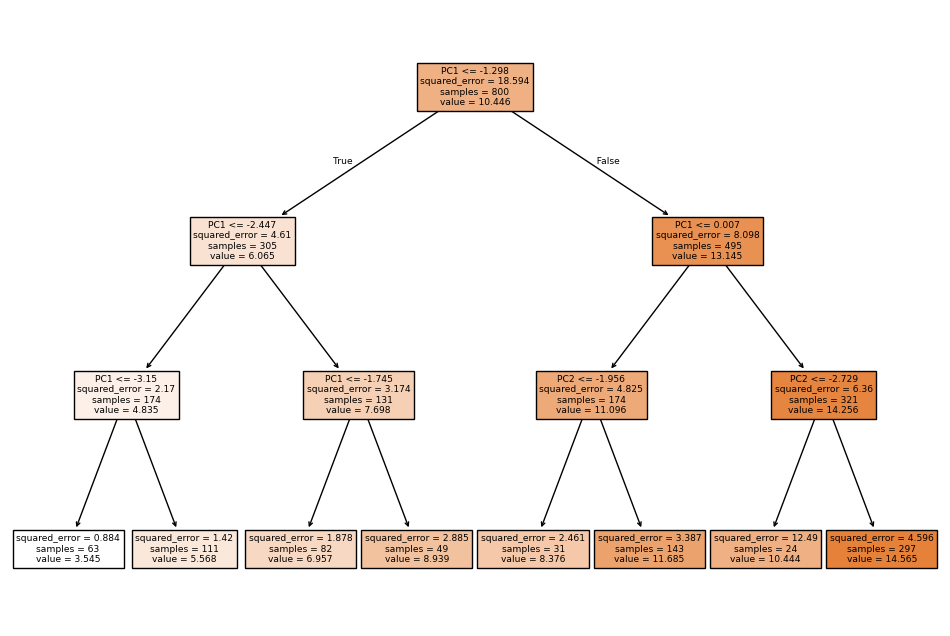

In [311]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X_train_preprocessed.columns, filled=True)
plt.show()

In [312]:
feature_importances = pd.DataFrame({
    "Feature": X_train_preprocessed.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importances)

   Feature  Importance
0      PC1    0.945979
1      PC2    0.054021
30    PC31    0.000000
29    PC30    0.000000
28    PC29    0.000000
27    PC28    0.000000
26    PC27    0.000000
25    PC26    0.000000
24    PC25    0.000000
23    PC24    0.000000
22    PC23    0.000000
21    PC22    0.000000
20    PC21    0.000000
19    PC20    0.000000
18    PC19    0.000000
17    PC18    0.000000
16    PC17    0.000000
15    PC16    0.000000
14    PC15    0.000000
13    PC14    0.000000
12    PC13    0.000000
11    PC12    0.000000
10    PC11    0.000000
9     PC10    0.000000
8      PC9    0.000000
7      PC8    0.000000
6      PC7    0.000000
5      PC6    0.000000
4      PC5    0.000000
3      PC4    0.000000
2      PC3    0.000000
31    PC32    0.000000


In [314]:
pc1_contributions = pca_loadings["PC2"].abs().sort_values(ascending=False)

print("Variables with the highest impact on PC2:")
print(pc1_contributions.head())

Variables with the highest impact on PC2:
D4A_Ranked    0.199995
D5DEI         0.195763
D5DRI         0.195763
D5DR          0.195763
D5DE          0.195763
Name: PC2, dtype: float64
